In [1]:
import numpy as np
import keras
import tensorflow
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.layers.normalization import BatchNormalization
from tensorflow.keras.datasets import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.metrics import categorical_crossentropy
import itertools
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11425358849299229465
]


2. AlexNet Implementation

In [13]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding="valid"))
model.add(Activation("relu"))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="valid"))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding="valid"))
model.add(Activation("relu"))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="valid"))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="valid"))
model.add(Activation("relu"))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="valid"))
model.add(Activation("relu"))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="valid"))
model.add(Activation("relu"))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="valid"))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation("relu"))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation("relu"))
# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(2))
model.add(Dense(2, activation='softmax'))



model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_1 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 384)         8

3. Manage The whole Datasets into Train, Test and Validation set.

In [14]:
%run config.ipynb

C:\Users\Misu


In [15]:
# import the necessary packages
#!pip install ipynb
#from ipynb.fs.full.<config.ipynb> import *

#!pip install import-ipynb
import import_ipynb
import config


#import config.ipynb
import config
from imutils import paths
import random
import shutil
import os

# For TA: grab the paths to all input images in the original input directory and shuffle them
imagePaths = list(paths.list_images(config.ORIG_INPUT_DATASET))
random.seed(42)
random.shuffle(imagePaths)

# compute the training and testing split
i = int(len(imagePaths) * config.TRAIN_SPLIT)
trainPaths = imagePaths[:i]
testPaths = imagePaths[i:]

# we will be using part of the training data for validation
i = int(len(trainPaths) * config.VAL_SPLIT)
valPaths = trainPaths[:i]
trainPaths = trainPaths[i:]

# For TA: define the datasets that we will be building
datasets = [
    ("training", trainPaths, config.TRAIN_PATH),
    ("validation", valPaths, config.VAL_PATH),
    ("testing", testPaths, config.TEST_PATH)
]

In [9]:
#For TA: If the data is splitted once, do not run it again. It will create error.
#Basically the whole dataset will be merged into 2 folders: 0 and 1.
#Training: 0 and 1
#testing: 0 and 1
#Validation: 0 and 1


# loop over the datasets

for (dType, imagePaths, baseOutput) in datasets:
# show which data split we are creating
    print("[INFO] building '{}' split".format(dType))
    # if the output base output directory does not exist, create it
    if not os.path.exists(baseOutput):
        print("[INFO] 'creating {}' directory".format(baseOutput))
        os.makedirs(baseOutput)
    # loop over the input image paths
    for inputPath in imagePaths:
        # extract the filename of the input image and extract the class label ("0" for "negative" and "1" for "positive")
        filename = inputPath.split(os.path.sep)[-1]
        label = filename[-5:-4]
        # build the path to the label directory
        labelPath = os.path.sep.join([baseOutput, label])
        # if the label output directory does not exist, create it
        if not os.path.exists(labelPath):
            print("[INFO] 'creating {}' directory".format(labelPath))
            os.makedirs(labelPath)
        # construct the path to the destination image and then copy the image itself
        p = os.path.sep.join([labelPath, filename])
        shutil.copy2(inputPath, p)

[INFO] building 'training' split


SameFileError: 'C:/Users/Misu/datasets\\training\\0\\9036_idx5_x551_y2201_class0.png' and 'C:/Users/Misu/datasets\\training\\0\\9036_idx5_x551_y2201_class0.png' are the same file

In [11]:
#For manual split: If the code above doesn't work, please run this cell

#train_path="C:/Users/Misu/datasets/training"
#valid_path="C:/Users/Misu/datasets/testing"
#test_path="C:/Users/Misu/datasets/validation"

4. Data pre-processing and data augmentation

In [11]:
import os

#isExist = os.path.exists(train_path)
#print(isExist)

train_batches= ImageDataGenerator(featurewise_center=True,
    samplewise_center=True,
    featurewise_std_normalization=True,
    samplewise_std_normalization=True,
    zca_whitening=True,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None).flow_from_directory(config.TRAIN_PATH, target_size=(224,224), classes=['0','1'], batch_size=BS)


valid_batches= ImageDataGenerator(featurewise_center=True,
    samplewise_center=True,
    featurewise_std_normalization=True,
    samplewise_std_normalization=True,
    zca_whitening=True,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.4,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None).flow_from_directory(config.VAL_PATH, target_size=(224,224), classes=['0','1'], batch_size=BS)

test_batches= ImageDataGenerator(featurewise_center=True,
    samplewise_center=True,
    featurewise_std_normalization=True,
    samplewise_std_normalization=True,
    zca_whitening=True,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.4,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None).flow_from_directory(config.TEST_PATH, target_size=(224,224), classes=['0','1'], batch_size=BS, shuffle=False)

#model.summary()

c:\python\python39\lib\site-packages\keras_preprocessing\image\image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 255556 images belonging to 2 classes.
Found 42596 images belonging to 2 classes.
Found 99743 images belonging to 2 classes.


In [17]:
total_train = len(list(paths.list_images(config.TRAIN_PATH)))
print(total_train)
total_val = len(list(paths.list_images(config.VAL_PATH))) 
print(total_val)
total_test = len(list(paths.list_images(config.TEST_PATH)))
print(total_test)

num_epoch = 400
BS= 32

255556
42596
99743


In [19]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit_generator(train_batches, steps_per_epoch=25, validation_data=valid_batches, validation_steps=25, epochs=num_epoch, verbose=2)

c:\python\python39\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
c:\python\python39\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
c:\python\python39\lib\site-packages\keras_preprocessing\image\image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/400
25/25 - 48s - loss: 0.5453 - accuracy: 0.7138 - val_loss: 0.4597 - val_accuracy: 0.8000
Epoch 2/400


KeyboardInterrupt: 

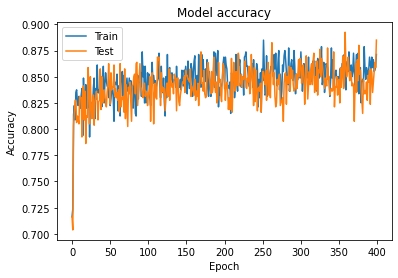

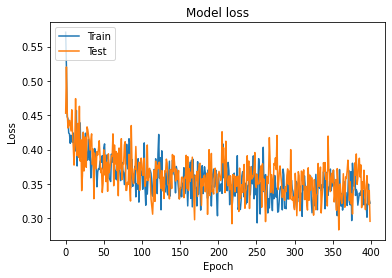

In [13]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [14]:
# Confution Matrix and Classification Report
Y_pred = model.predict_generator(test_batches,  (total_test // BS)+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_batches.classes, y_pred))
print('Classification Report')
target_names = ['Benign', 'Malignant']
print(classification_report(test_batches.classes, y_pred, target_names=target_names))

c:\python\python39\lib\site-packages\tensorflow\python\keras\engine\training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[64767  6528]
 [ 7799 20649]]
Classification Report
              precision    recall  f1-score   support

      Benign       0.89      0.91      0.90     71295
   Malignant       0.76      0.73      0.74     28448

    accuracy                           0.86     99743
   macro avg       0.83      0.82      0.82     99743
weighted avg       0.85      0.86      0.86     99743



In [15]:
cm = confusion_matrix(test_batches.classes, y_pred)
total = sum (sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total

sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[64767  6528]
 [ 7799 20649]]
acc: 0.8564
sensitivity: 0.9084
specificity: 0.7259
